<a href="https://colab.research.google.com/github/naveenreddy25/Recommendation-system/blob/main/Recommendations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import numpy as np 
from ast import literal_eval
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances

##### Load data into csv



In [3]:
movies_ = '/content/drive/MyDrive/Case 1 - EY Analytics Case Study/movies.csv'
rating_ = '/content/drive/MyDrive/Case 1 - EY Analytics Case Study/ratings.csv'
movies_meta_data_ = '/content/drive/MyDrive/Case 1 - EY Analytics Case Study/movies_metadata.csv'
tags_ = '/content/drive/MyDrive/Case 1 - EY Analytics Case Study/tags.csv'
links_ = '/content/drive/MyDrive/Case 1 - EY Analytics Case Study/links.csv'


In [4]:
movies = pd.read_csv(movies_)

In [7]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [5]:
rating = pd.read_csv(rating_)

In [9]:
movies_meta_data = pd.read_csv(movies_meta_data_)
tags = pd.read_csv(tags_)
links = pd.read_csv(links_)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
movies_meta_data.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [11]:
movies_meta_data.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [12]:
movies_meta_data = movies_meta_data.dropna()

In [13]:
new_data = movies_meta_data.copy()
#function iterates over the list and return the first name in the first dictionary 
def name(col):
        names = [i['name'] for i in col]
        names = names[:1]
        return names
    
#function converts the list into a string 
def list_String(st):  
    string = " "  
    return (string.join(st))
    
#applying the functions:

new_data['genres'] =new_data['genres'].apply(literal_eval)
new_data['production_companies'] = new_data['production_companies'].apply(literal_eval)
new_data['production_countries']=new_data['production_countries'].apply(literal_eval)
#note:literal_eval is a function make the list readable 

new_data['genres'] = new_data['genres'].apply(name)
new_data['production_companies'] = new_data['production_companies'].apply(name)
new_data['production_countries']=new_data['production_countries'].apply(name)


new_data['genres'] = new_data['genres'].apply(list_String)
new_data['production_companies'] =new_data['production_companies'].apply(list_String)
new_data['production_countries']=new_data['production_countries'].apply(list_String)

In [14]:
#reformatting the date type
new_data['release_date']=pd.to_datetime(new_data['release_date'])

In [15]:
print(new_data.dtypes)
new_data.head()

adult                            object
belongs_to_collection            object
budget                           object
genres                           object
homepage                         object
id                               object
imdb_id                          object
original_language                object
original_title                   object
overview                         object
popularity                       object
poster_path                      object
production_companies             object
production_countries             object
release_date             datetime64[ns]
revenue                         float64
runtime                         float64
spoken_languages                 object
status                           object
tagline                          object
title                            object
video                            object
vote_average                    float64
vote_count                      float64
dtype: object


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,Adventure,http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,14.686,/5c0ovjT41KnYIHYuF4AWsTe3sKh.jpg,United Artists,United Kingdom,1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0
68,False,"{'id': 43563, 'name': 'Friday Collection', 'po...",3500000,Comedy,http://www.newline.com/properties/friday.html,10634,tt0113118,en,Friday,Craig and Smokey are two guys in Los Angeles h...,14.5696,/kkoGT4bnK5oGiNbzGGcXzrXMSxn.jpg,New Line Cinema,United States of America,1995-04-26,28215918.0,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A lot can go down between thursday and saturda...,Friday,False,7.0,513.0
69,False,"{'id': 10924, 'name': 'From Dusk Till Dawn Col...",19000000,Horror,http://www.miramax.com/movie/from-dusk-till-dawn/,755,tt0116367,en,From Dusk Till Dawn,Seth Gecko and his younger brother Richard are...,15.3392,/ce0d4kM5KxT4x1Oq8JkSuNYevri.jpg,A Band Apart,United States of America,1996-01-19,25836616.0,108.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,One night is all that stands between them and ...,From Dusk Till Dawn,False,6.9,1644.0
153,False,"{'id': 439053, 'name': 'Brooklyn Cigar Store C...",2000000,Comedy,http://miramax.com/movie/blue-in-the-face/,5894,tt0112541,en,Blue in the Face,"Auggie runs a small tobacco shop in Brooklyn, ...",11.5281,/qa9yf3OlfXbYBb0af0mpawGB6TI.jpg,Miramax Films,United States of America,1995-09-15,1275000.0,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Welcome to the planet Brooklyn.,Blue in the Face,False,6.8,28.0
178,False,"{'id': 286162, 'name': 'Power Rangers Collecti...",15000000,Action,http://www.powerrangers.com/,9070,tt0113820,en,Mighty Morphin Power Rangers: The Movie,Power up with six incredible teens who out-man...,7.02423,/A3ijhraMN0tvpDnPoyVP7NulkSr.jpg,Twentieth Century Fox Film Corporation,Japan,1995-06-30,66000000.0,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Power Is On!,Mighty Morphin Power Rangers: The Movie,False,5.2,153.0


In [16]:
new_data=new_data[['budget', 'genres','original_language',
       'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime', 'title', 'vote_average',
       'vote_count']]

In [17]:
time_data= new_data.copy()

In [18]:
time_data.index=time_data['release_date']
time_data.drop('release_date',axis=1,inplace=True)

In [19]:
sns.set(rc={'figure.figsize':(7,5)})

In [20]:
time_data.head(5)

,budget,genres,original_language,popularity,production_companies,production_countries,revenue,runtime,title,vote_average,vote_count
release_date,,,,,,,,,,,
1995-11-16,58000000,Adventure,en,14.686,United Artists,United Kingdom,352194034.0,130.0,GoldenEye,6.6,1194.0
1995-04-26,3500000,Comedy,en,14.5696,New Line Cinema,United States of America,28215918.0,91.0,Friday,7.0,513.0
1996-01-19,19000000,Horror,en,15.3392,A Band Apart,United States of America,25836616.0,108.0,From Dusk Till Dawn,6.9,1644.0
1995-09-15,2000000,Comedy,en,11.5281,Miramax Films,United States of America,1275000.0,83.0,Blue in the Face,6.8,28.0
1995-06-30,15000000,Action,en,7.02423,Twentieth Century Fox Film Corporation,Japan,66000000.0,92.0,Mighty Morphin Power Rangers: The Movie,5.2,153.0


In [21]:
time_data['budget'] = time_data['budget'].astype(str).astype(int)
time_data['popularity'] = time_data['popularity'].astype(str).astype(float)

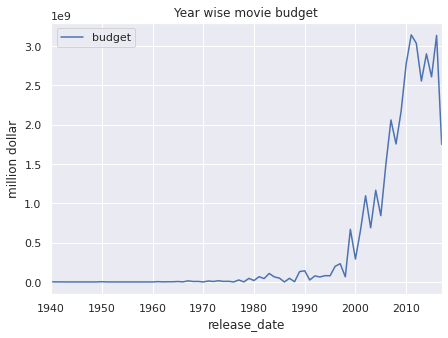

In [22]:
time_data[['budget']].resample('Y').sum().plot()
plt.ylabel('million dollar');
plt.title('Year wise movie budget');

In [23]:
time_data.dtypes


budget                    int64
genres                   object
original_language        object
popularity              float64
production_companies     object
production_countries     object
revenue                 float64
runtime                 float64
title                    object
vote_average            float64
vote_count              float64
dtype: object

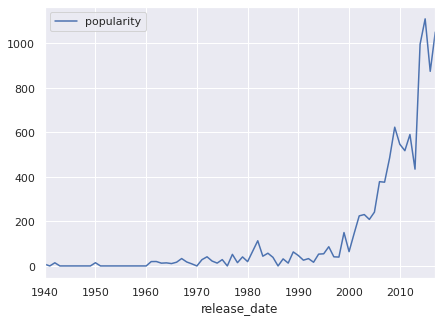

In [24]:
time_data[['popularity']].resample('Y').sum().plot()

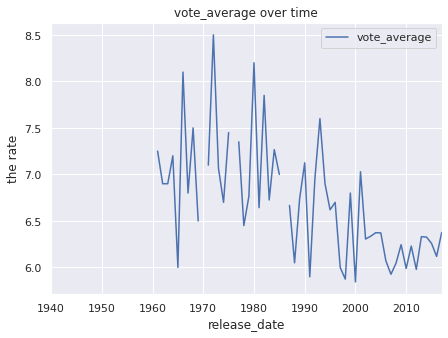

In [25]:
time_data[['vote_average']].resample('Y').mean().plot()
plt.title('vote_average over time');
plt.ylabel ('the rate');

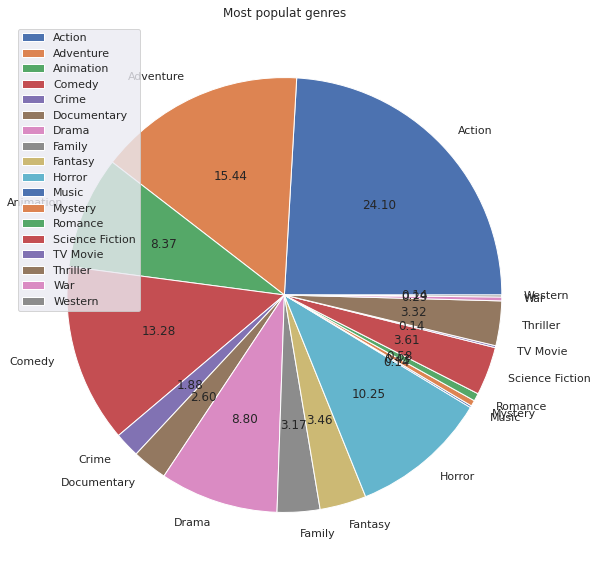

In [37]:
new_data.groupby(['genres']).count().plot.pie(y='budget',figsize=(10,10),autopct="%.2f")
plt.title('Most populat genres')
plt.ylabel('');

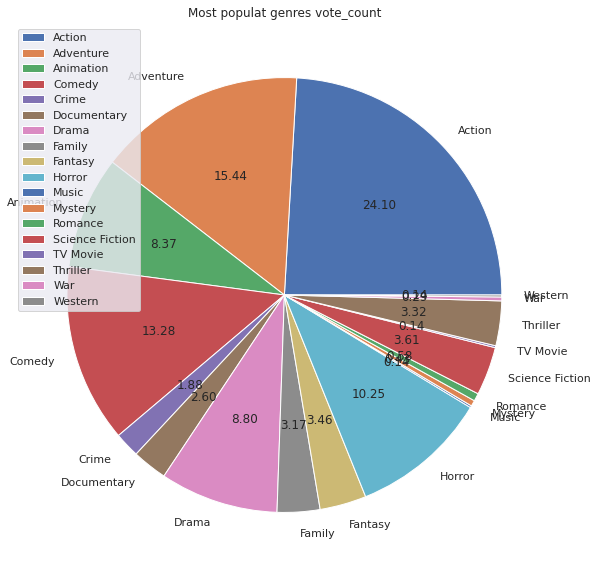

In [30]:
new_data.groupby(['genres']).count().plot.pie(y='vote_count',figsize=(10,10),autopct="%.2f")
plt.title('Most populat genres vote_count')
plt.ylabel('');

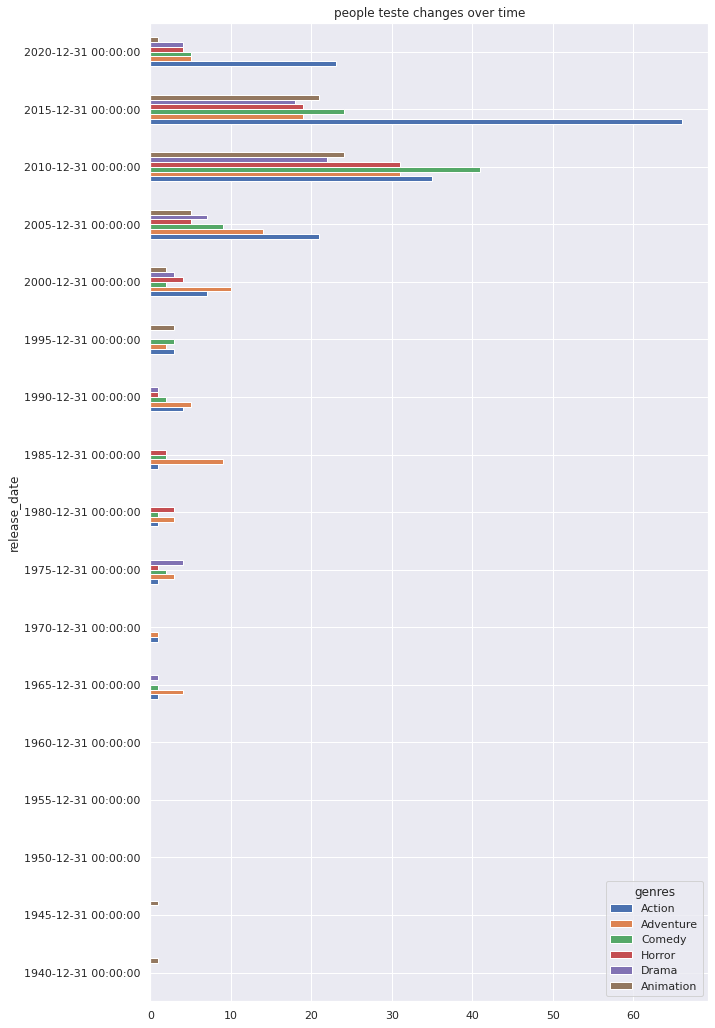

In [38]:
tr =new_data.groupby(['genres','release_date']).count()[['budget']]
tr=tr.reset_index()
tr['count']=1
tr=tr.pivot_table(index='release_date',columns='genres',values='count',aggfunc='sum').resample('5Y').sum()

ttr=tr.T

ttr['sum']=ttr.sum(axis = 1, skipna = True) 

ttr.sort_values(by='sum',ascending=False,inplace=True)

ttr=ttr.head(6).drop('sum',axis=1)

ttr.T.plot(kind='barh',figsize=(10,18),grid=True)
plt.title('people teste changes over time');

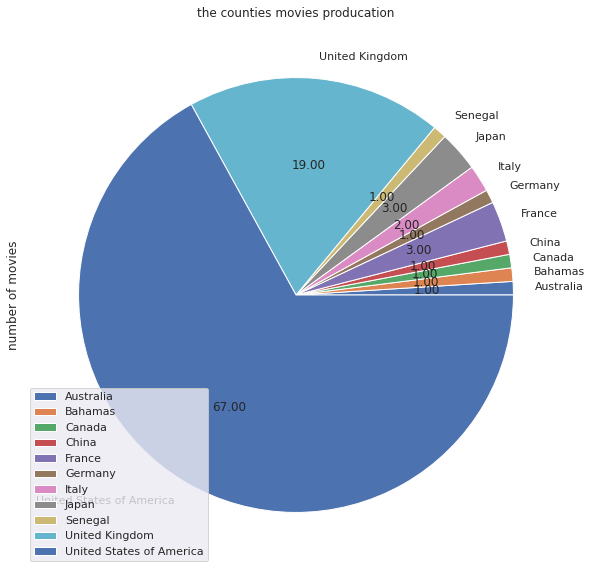

In [39]:
new_data.head(100).groupby(['production_countries']).count().plot.pie(y='budget',figsize=(10,10),autopct="%.2f")
plt.title('the counties movies producation');
plt.ylabel('number of movies');

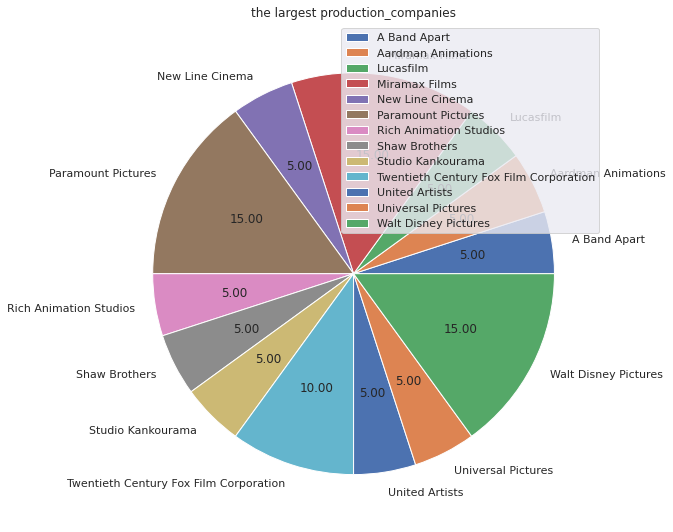

In [56]:
new_data.head(20).groupby(['production_companies']).count().plot.pie(y='budget',figsize=(9,15),autopct="%.2f")
plt.title('the largest production_companies');
plt.legend(loc="best")
plt.ylabel('');

Text(0.5, 1.0, 'Drama Over Years')

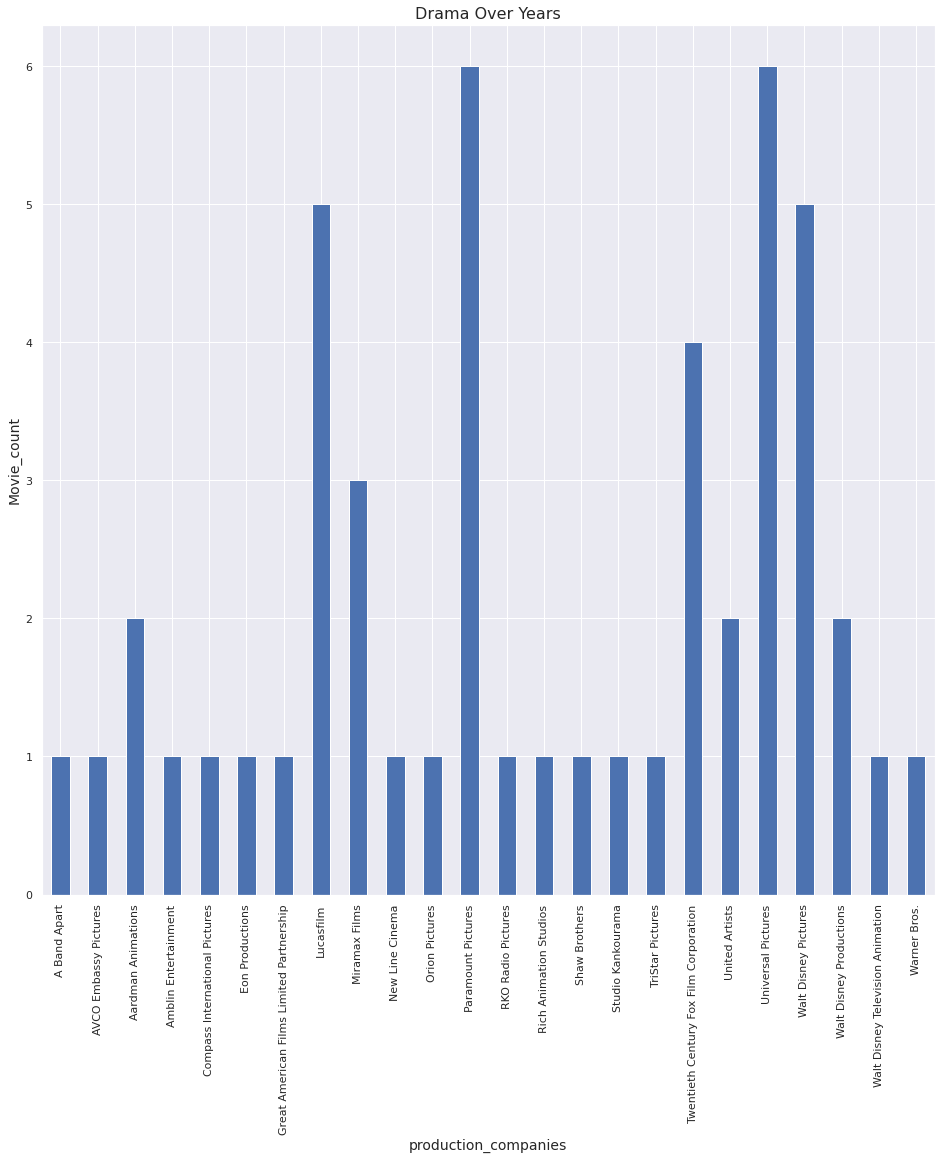

In [49]:
# Drama Movies
drama = new_data.head(50).groupby(['production_companies'])['budget'].count()
drama.plot(kind = 'bar',figsize=(16,16))
plt.xlabel('production_companies', fontsize = 14)
plt.ylabel('Movie_count', fontsize= 14)
plt.title('Drama Over Years', fontsize=16)

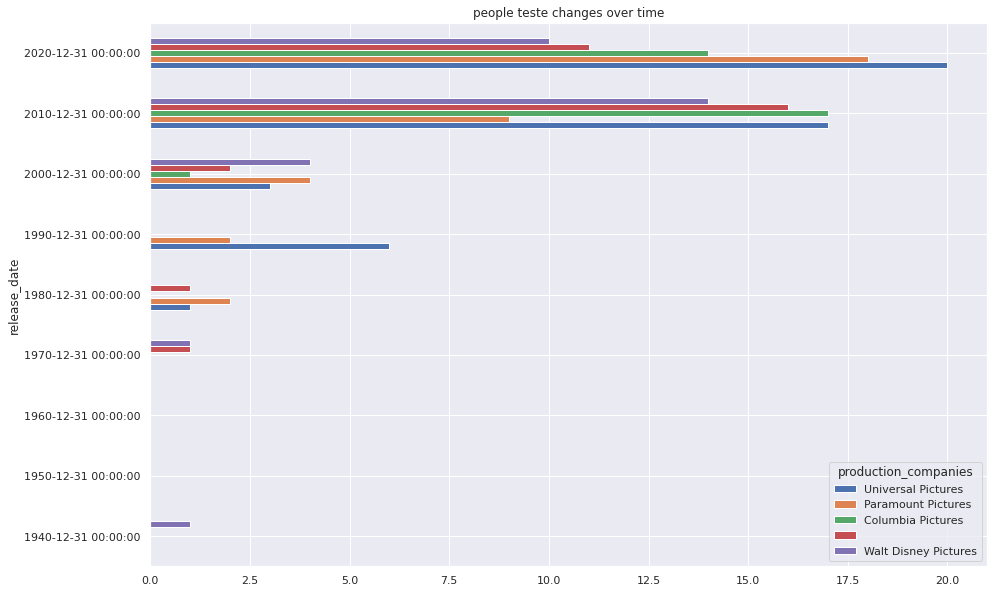

In [84]:
tr =new_data.groupby(['production_companies','release_date']).count()[['budget']]
tr=tr.reset_index()
tr['count']=1
tr=tr.pivot_table(index='release_date',columns='production_companies',values='count',aggfunc='sum').resample('10Y').sum()

ttr=tr.T

ttr['sum']=ttr.sum(axis = 1, skipna = True) 

ttr.sort_values(by='sum',ascending=False,inplace=True)

ttr=ttr.head().drop('sum',axis=1)

ttr.T.plot(kind='barh',figsize=(15,10),grid=True)
plt.title('people teste changes over time');

In [57]:
import pandas as pd
import numpy as np
from ast import literal_eval
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances

In [58]:
Mean = rating.groupby(by="userId",as_index=False)['rating'].mean()
Rating_avg = pd.merge(rating,Mean,on='userId')
Rating_avg['adg_rating']=Rating_avg['rating_x']-Rating_avg['rating_y']
Rating_avg.head()

,userId,movieId,rating_x,timestamp,rating_y,adg_rating
0,1,1,4.0,964982703,4.366379,-0.366379
1,1,3,4.0,964981247,4.366379,-0.366379
2,1,6,4.0,964982224,4.366379,-0.366379
3,1,47,5.0,964983815,4.366379,0.633621
4,1,50,5.0,964982931,4.366379,0.633621


In [59]:
check = pd.pivot_table(Rating_avg,values='rating_x',index='userId',columns='movieId')
check.head()

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,36,38,39,40,41,42,43,...,185135,185435,185473,185585,186587,187031,187541,187593,187595,187717,188189,188301,188675,188751,188797,188833,189043,189111,189333,189381,189547,189713,190183,190207,190209,190213,190215,190219,190221,191005,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
final = pd.pivot_table(Rating_avg,values='adg_rating',index='userId',columns='movieId')
final.head()

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,36,38,39,40,41,42,43,...,185135,185435,185473,185585,186587,187031,187541,187593,187595,187717,188189,188301,188675,188751,188797,188833,189043,189111,189333,189381,189547,189713,190183,190207,190209,190213,190215,190219,190221,191005,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,-0.366379,NaN,-0.366379,NaN,NaN,-0.366379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.935897,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.555556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.555556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.363636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.363636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.363636,0.363636,NaN,-0.636364,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
# Replacing NaN by Movie Average
final_movie = final.fillna(final.mean(axis=0))

# Replacing NaN by user Average
final_user = final.apply(lambda row: row.fillna(row.mean()), axis=1)

In [62]:
# user similarity on replacing NAN by user avg
b = cosine_similarity(final_user)
np.fill_diagonal(b, 0 )
similarity_with_user = pd.DataFrame(b,index=final_user.index)
similarity_with_user.columns=final_user.index
similarity_with_user.head()

userId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.000000,1.264516e-03,5.525772e-04,0.048419,0.021847,-0.045497,-6.199672e-03,0.047013,1.950985e-02,-8.754088e-03,-5.620640e-02,1.326621e-02,5.938345e-02,0.021815,0.037209,0.009664,0.037997,0.043789,0.085249,0.066990,0.011732,-0.004171,-0.023124,0.008417,0.001181,-1.351819e-02,4.530300e-02,0.001573,-0.006969,3.274438e-03,6.956394e-03,0.042510,0.012918,0.011187,2.150784e-02,2.652436e-02,-4.934852e-02,0.009979,-7.266614e-02,-0.041753,...,-3.037625e-02,0.046056,1.408778e-02,4.071870e-02,1.232650e-03,-8.180768e-05,0.089396,4.140371e-30,-1.050026e-01,0.019428,0.007481,9.521898e-03,-5.892852e-03,-1.114252e-02,1.002267e-02,0.011086,-4.307956e-02,-0.019135,-0.059246,0.095191,3.827620e-02,-5.950684e-02,0.082403,-0.006195,3.652909e-02,0.035349,0.102631,4.179383e-03,0.052614,0.069528,0.018127,-0.017172,-0.015221,-3.705875e-02,-2.912138e-02,0.012016,0.055261,0.075224,-2.571255e-02,0.010932
2,0.001265,0.000000e+00,1.327518e-29,-0.017164,0.021796,-0.021051,-1.111357e-02,-0.048085,1.375280e-29,3.011629e-03,-2.745410e-03,1.848893e-32,3.047559e-03,0.012518,-0.033280,-0.014771,-0.001263,-0.047825,-0.000106,0.000610,-0.001949,-0.024828,-0.001169,-0.037418,0.016208,-7.200544e-30,3.152397e-31,-0.004238,-0.019714,-3.399468e-02,4.725300e-30,-0.032900,0.008467,-0.008806,-4.483083e-29,-3.370691e-02,7.806392e-03,-0.042923,6.162976e-33,-0.026103,...,-4.467151e-30,-0.006322,2.238275e-02,-5.331292e-02,1.180529e-29,1.181205e-29,-0.029436,1.307613e-29,-2.281961e-30,-0.009902,-0.071276,-2.549881e-02,-1.193537e-03,2.119956e-29,1.072662e-02,-0.012535,4.721092e-30,-0.048090,-0.035668,0.002703,2.482889e-03,-1.031647e-02,-0.026120,0.000338,-2.466156e-29,0.031263,0.006005,1.917654e-03,-0.000213,-0.000980,-0.050551,-0.031581,-0.001688,-3.870175e-30,-1.625915e-29,0.006226,-0.020504,-0.006001,-6.009100e-02,0.024999
3,0.000553,1.327518e-29,0.000000e+00,-0.011260,-0.031539,0.004800,8.978458e-30,-0.032471,8.429150e-30,1.685984e-30,8.859278e-33,9.244464e-33,6.089501e-30,0.008453,-0.046046,-0.005142,-0.004690,-0.012322,-0.009560,-0.021145,-0.022848,0.010239,-0.030150,-0.009327,-0.015357,-4.247490e-30,-5.515577e-03,0.016266,-0.017537,-4.552330e-30,-1.704944e-03,-0.045848,-0.030532,0.029048,-2.460005e-29,9.020801e-31,-2.502880e-29,-0.028985,2.864472e-02,-0.003331,...,-2.542548e-02,-0.005930,9.824902e-30,1.218842e-29,6.203322e-30,-4.999971e-02,-0.037601,8.435260e-30,-1.013576e-03,0.015241,-0.037817,-6.316018e-30,-1.157043e-29,1.193058e-29,-1.674576e-29,0.031381,-1.332141e-02,-0.014251,-0.024086,-0.028410,2.757398e-30,-9.207454e-30,0.010920,-0.007823,-1.294163e-29,0.018377,-0.020662,4.376734e-30,0.000223,-0.004669,-0.004904,-0.016117,0.017749,-2.108642e-30,-1.430628e-03,-0.037289,-0.007789,-0.013001,9.688559e-30,0.019550
4,0.048419,-1.716402e-02,-1.125978e-02,0.000000,-0.029620,0.013956,5.809139e-02,0.002065,-5.873603e-03,5.159032e-02,6.245327e-02,-1.605624e-02,-5.903304e-02,-0.058388,0.033399,-0.027573,-0.039002,-0.004090,0.009273,0.035423,-0.005827,-0.006829,-0.014836,-0.008388,-0.008842,-1.729245e-02,1.700677e-02,0.014857,0.033426,9.596864e-04,-6.446306e-03,0.056834,0.011651,0.050031,4.037649e-03,-1.010067e-03,-1.558075e-02,0.022612,2.364001e-02,-0.002802,...,5.153728e-03,-0.014396,-1.012132e-03,3.299309e-02,-2.610603e-02,-2.594862e-02,0.060230,2.462502e-30,-2.099000e-02,-0.078191,0.049113,-2.630610e-02,-3.076547e-02,-8.766061e-03,4.294412e-03,-0.016293,-4.037277e-02,0.007293,-0.008866,0.087103,-1.826945e-02,-1.676408e-02,0.057924,-0.007381,9.839663e-03,-0.001616,0.044671,-1.585653e-02,0.014862,0.023748,-0.037687,0.063122,0.027640,-1.378212e-02,4.003747e-02,0.020590,0.014628,-0.037569,-1.788358e-02,-0.000995


In [63]:
# user similarity on replacing NAN by item(movie) avg
cosine = cosine_similarity(final_movie)
np.fill_diagonal(cosine, 0 )
similarity_with_movie = pd.DataFrame(cosine,index=final_movie.index)
similarity_with_movie.columns=final_user.index
similarity_with_movie.head()

userId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.988283,0.978406,0.964220,0.986819,0.970456,0.971643,0.987468,0.986382,0.973397,0.985426,0.988332,0.988353,0.986383,0.976155,0.987074,0.986633,0.979841,0.952961,0.972170,0.957461,0.967073,0.984224,0.987188,0.989361,0.989402,0.979253,0.962555,0.987513,0.988480,0.985604,0.985576,0.978063,0.977739,0.988437,0.985904,0.988222,0.983802,0.979220,0.981469,...,0.977277,0.980324,0.970215,0.989065,0.986858,0.987083,0.983002,0.988237,0.983080,0.953648,0.988626,0.987723,0.986871,0.981660,0.987756,0.981762,0.977395,0.985451,0.986662,0.968628,0.985289,0.982281,0.981890,0.961980,0.989080,0.980282,0.964258,0.985040,0.920556,0.936043,0.987335,0.978916,0.917922,0.983978,0.978638,0.959693,0.976120,0.932806,0.989380,0.952774
2,0.988283,0.000000,0.987141,0.971166,0.995793,0.979893,0.981852,0.995168,0.995108,0.981285,0.995464,0.996840,0.996797,0.995102,0.985139,0.994999,0.995498,0.987731,0.960341,0.979547,0.966378,0.975363,0.993078,0.996168,0.998158,0.998088,0.987504,0.971578,0.996097,0.997421,0.994459,0.994028,0.987402,0.986031,0.997123,0.994037,0.997253,0.992375,0.989829,0.991088,...,0.986791,0.987507,0.979702,0.996998,0.995984,0.995704,0.990572,0.996929,0.993251,0.962771,0.997373,0.996230,0.995393,0.990566,0.996383,0.990112,0.987296,0.994915,0.995975,0.977772,0.993489,0.992370,0.989370,0.970923,0.997774,0.989058,0.971012,0.993090,0.929719,0.943868,0.996067,0.988455,0.929086,0.993014,0.988206,0.968868,0.983619,0.940224,0.997957,0.963114
3,0.978406,0.987141,0.000000,0.961237,0.985179,0.970773,0.971932,0.985140,0.985263,0.971464,0.985471,0.986979,0.986985,0.985326,0.974149,0.985619,0.985648,0.978622,0.950642,0.969278,0.955516,0.966994,0.982786,0.986202,0.988395,0.988215,0.977569,0.962730,0.986329,0.987411,0.984585,0.983803,0.976788,0.976892,0.987260,0.984393,0.987131,0.982326,0.980675,0.981283,...,0.976381,0.977812,0.969769,0.987228,0.986132,0.985641,0.980168,0.987067,0.983532,0.955255,0.987463,0.986479,0.985512,0.980767,0.986482,0.981281,0.977213,0.985293,0.986001,0.966892,0.983726,0.982437,0.980462,0.960945,0.987904,0.979291,0.960384,0.983305,0.920216,0.934482,0.986072,0.978562,0.921433,0.983193,0.978363,0.957067,0.974114,0.930653,0.988086,0.954265
4,0.964220,0.971166,0.961237,0.000000,0.968638,0.955187,0.958876,0.970090,0.969158,0.959626,0.970514,0.970860,0.970038,0.968017,0.961457,0.970117,0.969530,0.962554,0.932099,0.955444,0.941058,0.950481,0.968213,0.970692,0.972485,0.972150,0.960875,0.947667,0.970849,0.971574,0.968109,0.968911,0.962136,0.962935,0.971567,0.967961,0.971003,0.967791,0.964644,0.965140,...,0.961265,0.960270,0.953604,0.972047,0.969557,0.969451,0.965771,0.971161,0.967274,0.932632,0.973151,0.970465,0.969198,0.964985,0.971152,0.964059,0.960748,0.969539,0.970151,0.954952,0.967584,0.965880,0.965106,0.944556,0.971626,0.962765,0.945840,0.967729,0.902869,0.918680,0.970625,0.964815,0.903118,0.967106,0.963962,0.942701,0.958891,0.911591,0.972100,0.935866
5,0.986819,0.995793,0.985179,0.968638,0.000000,0.978368,0.980011,0.992905,0.993494,0.979161,0.993463,0.995495,0.995298,0.992335,0.982842,0.993134,0.993715,0.986791,0.957967,0.978659,0.964467,0.973887,0.991325,0.994626,0.996455,0.996557,0.985960,0.969918,0.994427,0.996056,0.992886,0.992486,0.985903,0.985414,0.996489,0.992462,0.995850,0.991765,0.987808,0.989230,...,0.984923,0.986344,0.977956,0.995308,0.994556,0.994090,0.990019,0.995313,0.991411,0.961329,0.995719,0.994720,0.993418,0.989200,0.994739,0.988038,0.986173,0.993792,0.994736,0.976608,0.991944,0.989533,0.988194,0.969313,0.996068,0.987274,0.969682,0.991519,0.928649,0.942851,0.994448,0.986028,0.928126,0.991066,0.986090,0.967230,0.982366,0.938353,0.996584,0.960854


In [64]:
def find_n_neighbours(df,n):
    order = np.argsort(df.values, axis=1)[:, :n]
    df = df.apply(lambda x: pd.Series(x.sort_values(ascending=False)
           .iloc[:n].index, 
          index=['top{}'.format(i) for i in range(1, n+1)]), axis=1)
    return df

In [65]:
# top 30 neighbours for each user
sim_user_30_u = find_n_neighbours(similarity_with_user,30)
sim_user_30_u.head()

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10,top11,top12,top13,top14,top15,top16,top17,top18,top19,top20,top21,top22,top23,top24,top25,top26,top27,top28,top29,top30
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,301,597,414,477,57,369,206,535,590,418,120,75,577,198,160,226,266,312,19,135,484,469,72,593,44,297,434,483,449,552
2,189,246,378,209,227,326,393,332,196,528,537,143,417,524,163,564,560,306,60,111,114,153,596,495,407,567,93,308,496,222
3,441,496,549,231,527,537,313,518,244,246,344,152,433,285,440,442,159,131,355,243,309,586,230,303,34,161,39,47,127,138
4,75,137,590,391,43,128,462,250,290,85,59,202,602,11,465,577,457,120,7,510,472,593,299,32,349,268,159,199,173,426
5,145,35,565,134,58,444,446,347,530,142,436,38,476,144,512,507,478,242,37,191,94,569,411,588,584,404,498,323,536,437


In [66]:
# top 30 neighbours for each user
sim_user_30_m = find_n_neighbours(similarity_with_movie,30)
sim_user_30_m.head()

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10,top11,top12,top13,top14,top15,top16,top17,top18,top19,top20,top21,top22,top23,top24,top25,top26,top27,top28,top29,top30
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,49,54,72,53,515,550,189,133,26,513,609,25,87,206,214,289,194,299,507,251,145,60,595,574,556,92,435,163,439,340
2,49,189,515,53,25,145,54,26,87,194,609,214,60,289,550,72,293,92,595,556,65,163,251,150,299,440,519,507,245,521
3,515,49,25,53,496,54,442,72,26,87,194,550,189,172,609,214,289,440,293,145,92,595,556,65,463,251,180,150,163,439
4,581,54,189,49,25,515,300,53,472,251,299,87,173,550,521,340,192,194,107,293,26,289,463,609,214,206,507,574,120,556
5,145,49,515,53,609,26,189,550,35,87,194,25,60,54,530,565,134,507,214,289,293,142,72,92,556,439,478,163,595,299


In [67]:
def get_user_similar_movies( user1, user2 ):
    common_movies = Rating_avg[Rating_avg.userId == user1].merge(
    Rating_avg[Rating_avg.userId == user2],
    on = "movieId",
    how = "inner" )
    return common_movies.merge( movies, on = 'movieId' )

In [120]:
def User_item_score(user,item):
    a = sim_user_30_m[sim_user_30_m.index==user].values
    b = a.squeeze().tolist()
    c = final_movie.loc[:,item]
    d = c[c.index.isin(b)]
    f = d[d.notnull()]
    avg_user = Mean.loc[Mean['userId'] == user,'rating'].values[0]
    index = f.index.values.squeeze().tolist()
    corr = similarity_with_movie.loc[user,index]
    fin = pd.concat([f, corr], axis=1)
    fin.columns = ['adg_score','correlation']
    fin['score']=fin.apply(lambda x:x['adg_score'] * x['correlation'],axis=1)
    nume = fin['score'].sum()
    deno = fin['correlation'].sum()
    final_score = avg_user + (nume/deno)
    return final_score

In [69]:
Rating_avg = Rating_avg.astype({"movieId": str})
Movie_user = Rating_avg.groupby(by = 'userId')['movieId'].apply(lambda x:','.join(x))

In [70]:
def User_item_score1(user):
    Movie_seen_by_user = check.columns[check[check.index==user].notna().any()].tolist()
    a = sim_user_30_m[sim_user_30_m.index==user].values
    b = a.squeeze().tolist()
    d = Movie_user[Movie_user.index.isin(b)]
    l = ','.join(d.values)
    Movie_seen_by_similar_users = l.split(',')
    Movies_under_consideration = list(set(Movie_seen_by_similar_users)-set(list(map(str, Movie_seen_by_user))))
    Movies_under_consideration = list(map(int, Movies_under_consideration))
    score = []
    for item in Movies_under_consideration:
        c = final_movie.loc[:,item]
        d = c[c.index.isin(b)]
        f = d[d.notnull()]
        avg_user = Mean.loc[Mean['userId'] == user,'rating'].values[0]
        index = f.index.values.squeeze().tolist()
        corr = similarity_with_movie.loc[user,index]
        fin = pd.concat([f, corr], axis=1)
        fin.columns = ['adg_score','correlation']
        fin['score']=fin.apply(lambda x:x['adg_score'] * x['correlation'],axis=1)
        nume = fin['score'].sum()
        deno = fin['correlation'].sum()
        final_score = avg_user + (nume/deno)
        score.append(final_score)
    data = pd.DataFrame({'movieId':Movies_under_consideration,'score':score})
    top_5_recommendation = data.sort_values(by='score',ascending=False).head(5)
    
    Movie_Name = top_5_recommendation.merge(movies, how='inner', on='movieId')
    #print(Movie_Name)
    #Movie_Names = Movie_Name.title.values.tolist()
    return Movie_Name

In [71]:
predicted_movies = User_item_score1(1)


In [78]:
Total_users = set(rating['userId'])
Total_users = list(Total_users)

In [89]:
Movies_by_user = pd.DataFrame()
for i in Total_users:
  predicted_movies = User_item_score1(i)
  predicted_movies['userId'] = i
  Movies_by_user = Movies_by_user.append(predicted_movies)



In [92]:
Movies_by_user = Movies_by_user.reset_index()
Movies_by_user

,index,movieId,score,title,genres,userId
0,0,177593,5.368795,"Three Billboards Outside Ebbing, Missouri (2017)",Crime|Drama,1
1,1,1150,5.198434,"Return of Martin Guerre, The (Retour de Martin...",Drama,1
2,2,750,5.071086,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,1
3,3,858,4.984740,"Godfather, The (1972)",Crime|Drama,1
4,4,318,4.982594,"Shawshank Redemption, The (1994)",Crime|Drama,1
...,...,...,...,...,...,...
3045,0,177593,4.690980,"Three Billboards Outside Ebbing, Missouri (2017)",Crime|Drama,610
3046,1,1150,4.520612,"Return of Martin Guerre, The (Retour de Martin...",Drama,610
3047,2,246,4.361150,Hoop Dreams (1994),Documentary,610
3048,3,162,4.302282,Crumb (1994),Documentary,610


In [115]:
movies_with_s_a = set(movies['title'])

movies_with_s_a = list(movies_with_s_a)


In [116]:
rewrd1 = 's'
s_list =  [word for word in movies_with_s_a if word.startswith('S')]
a_list = [word for word in movies_with_s_a if word.startswith('A')]

movies_req = s_list + a_list


In [136]:
user_score_df = pd.DataFrame()
for u in Total_users:
  for mvi in movies_req:
    mvid = movies['movieId'][movies['title'] == mvi]
    if mvid.any():
      mvid = mvid.iloc[0]
      score = User_item_score(u,mvid)
      user_score_df['userid'] = u
      user_score_df['movieid'] = mvid
      user_score_df['title'] = mvi
      user_score_df['score'] = score


KeyError: ignored

In [1]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
rating

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [7]:
dataset = rating
n_users = dataset.userId.unique().shape[0]
n_items = dataset.movieId.unique().shape[0]
n_items = dataset['movieId'].max()
A = np.zeros((n_items,n_users))
for line in dataset.itertuples():
    A[line[1]-1,line[2]-1] = line[3]
print("Original rating matrix : ",A)


IndexError: ignored

In [134]:
mvid.iloc[0]

2851